In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter
from adjustText import adjust_text
from matplotlib.lines import Line2D 
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Reading .csv files
final_mean_df = pd.read_csv('Resources/final_combined_variables_world_happiness_regions.csv')
final_mean_df.head()

,Unnamed: 0,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP,Inflation
0,1,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,1.726728
1,2,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,4.599003
2,4,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,1.452263
3,5,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,1.651235
4,6,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,1.479740


In [3]:
# remove duplicated columns
final_mean_df = final_mean_df.drop(columns=['Unnamed: 0'])

#rename columns
final_mean_df = final_mean_df.rename(columns={'Net National Income per capita': 'Net National Income Total', 'GDP':'GDP Total'})
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income Total,GDP Total,Inflation
0,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,1.726728
1,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,4.599003
2,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,1.452263
3,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,1.651235
4,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,1.479740


In [4]:
# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Divide National Income, GDP values
final_mean_df['Net National Income Total ($) billions'] = (final_mean_df['Net National Income Total'].astype(float)/1000000000).round(2)
final_mean_df['GDP Total ($) billions'] = (final_mean_df['GDP Total'].astype(float)/1000000000).round(2)

# Drop raw National Income, GDP value columns
final_mean_df = final_mean_df.drop(columns=['Net National Income Total', 'GDP Total'])

# Capitalize first letter of items in region category
final_mean_df['Region'] = final_mean_df['Region'].str.capitalize()
final_mean_df.head()



,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Inflation,Net National Income Total ($) billions,GDP Total ($) billions
0,Albania,ALB,Europe,5.20,79.00,4.60,14.00,1.73,10.95,13.37
1,Algeria,DZA,Africa,5.12,75.93,2.56,10.54,4.60,134.99,168.56
2,Armenia,ARM,Europe,5.40,74.90,4.06,18.17,1.45,10.39,11.74
3,Australia,AUS,Asia,7.16,82.60,12.68,5.56,1.65,"1,040.77","1,340.84"
4,Austria,AUT,Europe,7.16,81.61,15.44,5.31,1.48,340.09,418.94


In [5]:
# verify that there is no null values 
final_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            111 non-null    object 
 1   Country Code                            111 non-null    object 
 2   Region                                  111 non-null    object 
 3   Happiness Score                         111 non-null    float64
 4   Life Expectancy                         111 non-null    float64
 5   Suicide Rate                            111 non-null    float64
 6   Unemployment Rate                       111 non-null    float64
 7   Inflation                               111 non-null    float64
 8   Net National Income Total ($) billions  111 non-null    float64
 9   GDP Total ($) billions                  111 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.8+ KB


In [6]:
# save new csv file
final_mean_df.to_csv('Resources/final_mean_df.csv', index=True)

In [7]:
# create summary statistics 
final_mean_df.describe()
quartiles = final_mean_df['Happiness Score'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of happiness score is: {lowerq}")
print(f"The upper quartile of happiness score is: {upperq}")
print(f"The interquartile range of happiness score is: {iqr}")
print(f"The the median of happiness score is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_suicide_rate = final_mean_df.loc[(final_mean_df['Happiness Score'] < lower_bound) | (final_mean_df['Happiness Score'] > upper_bound)]
outlier_suicide_rate

The lower quartile of happiness score is: 4.9145
The upper quartile of happiness score is: 6.366
The interquartile range of happiness score is: 1.4514999999999993
The the median of happiness score is: 5.737 
Values below 2.7372500000000013 could be outliers.
Values above 8.543249999999999 could be outliers.


,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Inflation,Net National Income Total ($) billions,GDP Total ($) billions


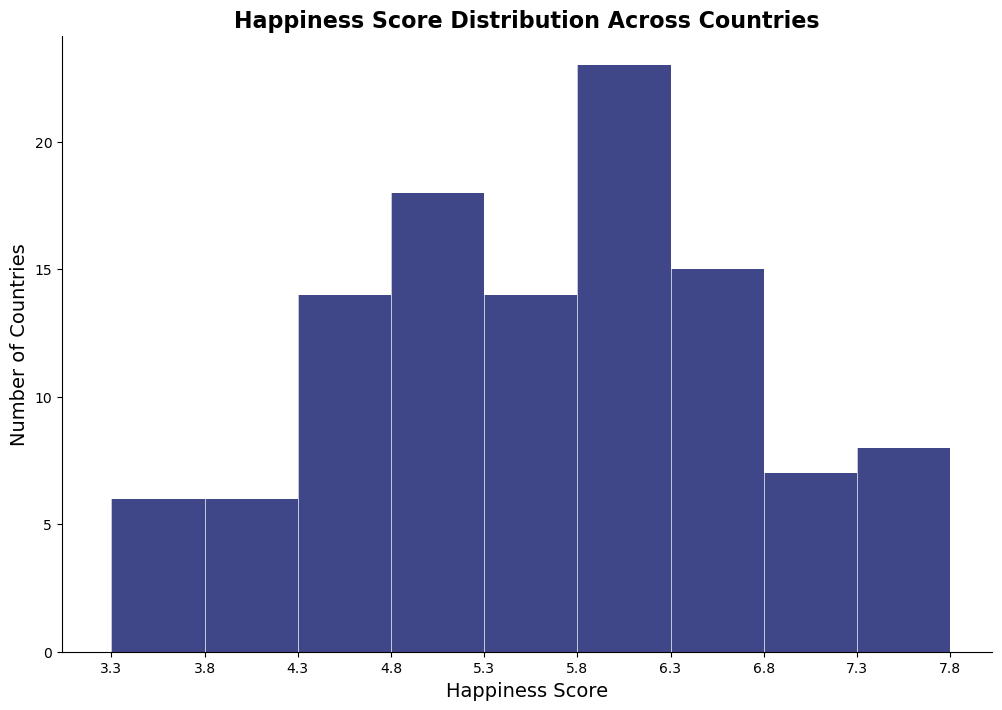

In [8]:
# create hist to show distribution of mean happiness score across countries 
happiness_mean = final_mean_df['Happiness Score']

# plotting histogram
fig, ax = plt.subplots(figsize=(12,8))

# assigning bins 
counts, bins, patches = ax.hist(final_mean_df['Happiness Score'], bins='doane', color='#404788FF')

# assigning bins to xticks
ax.set_xticks(bins)

# format xticks values 
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# adding gridlines to x-axis
plt.grid(color='white', lw = 0.5, axis='x')

# histogram title, x and y labels
plt.xlabel("Happiness Score", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)

#plt.ticklabel_format(useMathText=True)
plt.title('Happiness Score Distribution Across Countries', weight='bold', fontsize=16)

# hide the right and top spines
ax.spines[['top', 'right']].set_visible(False)

# adjust x-axis 
ax.set_xlim(xmin=3)

plt.savefig('output/happiness_distribution.png', dpi=800)
plt.show()

# print(plt.style.available)
# print(bins)

In [9]:
# Run the normality test on the whole happiness_mean DataFrame                                                                           
print(st.normaltest(happiness_mean.sample(111)))
# If the p-value is 0.05 or lower, the result is trumpeted as significant, 
# but if it is higher than 0.05, the result is non-significant and tends to be passed over in silence

NormaltestResult(statistic=4.238879537499116, pvalue=0.12009889282081507)


In [10]:
# calculate standard dviation and mean of means
sd_sr = np.std(happiness_mean,ddof = 0)
mean_sr = np.mean(happiness_mean)
print(f"The happiness mean standard deviation is {sd_sr}")
print(f'The average happiness score is {mean_sr}')

The happiness mean standard deviation is 1.053927824273416
The average happiness score is 5.631324324324322


In [11]:
final_mean_df['Region'].value_counts()

Europe      35
Africa      30
Asia        27
Americas    19
Name: Region, dtype: int64

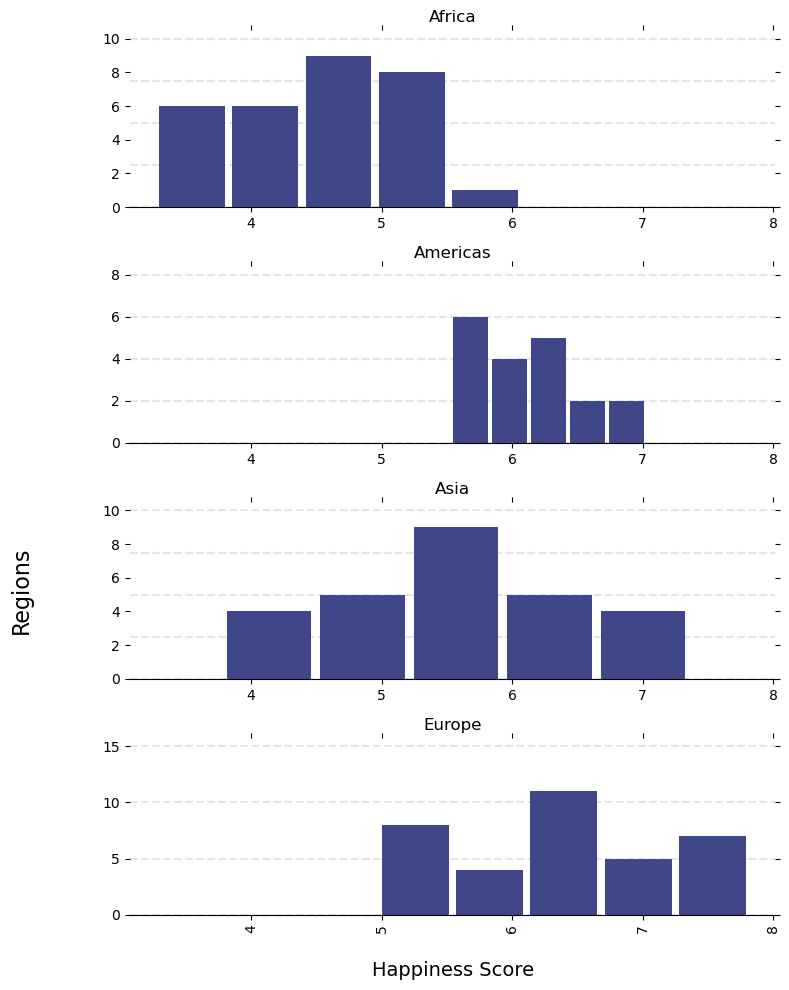

In [12]:
ax = final_mean_df.hist(column='Happiness Score', by='Region', bins=5, grid=False, figsize=(8,10), layout=(4,1), sharex=True, color='#404788FF', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # remove spines
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # ticks off
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#BEBEBE', zorder=1)

    # x-axis label
    x.set_xlabel("Happiness Score", labelpad=20, size=14)

    # Set y-axis label
    if i == 2:
        x.set_ylabel("Regions", labelpad=50, size=16)
        
plt.tight_layout()        
plt.savefig('output/happiness_distributionby_region.png', dpi=600)
plt.show()

In [13]:
# function to plot Linear Regression
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    from matplotlib.pyplot import figure
    import datetime
    
    # calculating linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plotting
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata, color=colors, edgecolors=edge_col,
    s=300, alpha=0.5,  zorder=10)
    
    # lin reg line
    plt.plot(xdata, regress_values, color='#a00705')
    
    # add grid lines, only for y axis
    ax.grid(axis='y', alpha=0.3)
    
    # place formula on the graph
    plt.annotate(line_eq,lblpos,fontsize=27,color="#f58800")
    
    # omit scientific notation
    plt.ticklabel_format(useMathText=True)
    
    # set y-axis limit and both axis labels
    plt.ylim(1,8.5)
    plt.xlabel(xlbl, fontsize=18)
    plt.ylabel(ylbl, fontsize=18)
    
    #set fig sixe
    fig.set_size_inches(15, 10)
        
    # remove tick marks on both x and y axes
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)   

    # remove all spines except the bottom one
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # establish regions for plotting
    regions = ["Africa", "Americas", "Asia", "Europe"]

    # create handles for lines.
    handles = [
        Line2D(
            [], [], label=label,
            lw=0, 
            marker="o", 
            markersize=20, 
            # color
            markerfacecolor=reg_col[idx])
        
        for idx, label in enumerate(regions)]

    # append a handle for the line
    handles += [Line2D([], [], label='Regions')]

    # add legend 
    legend = fig.legend(
    handles=handles,
    # location
    bbox_to_anchor=[0.5, 0.95],
    fontsize=12,
    # space between the text and the marker
    handletextpad=0.6, 
    handlelength=1.4, 
    columnspacing=1.4,
    loc="center", 
    ncol=5,
    frameon=False)
    
    # countries
    countries = final_mean_df['Country Name'].values
    
    # select countries to grath
    graph_countries = ["Finland", "Russian Federation", "Ukraine", "Lesotho", "Eswatini", 
    "Lithuania", "Gabon", "Japan", "Italy", "United States"]

    # add labels
    items = []
    for idx, country in enumerate(countries):
        # append only selected countries
        if country in graph_countries:
            x, y = xdata[idx], ydata[idx]
            items.append(ax.text(x, y, country, fontsize=12));

    adjust_text(
        items, 
        expand_points=(5, 5),
        # arrow properties like no pointer
        arrowprops=dict(arrowstyle="-", lw=1),
        ax=ax)
    
    # save each graph with a new data point using datetimemodule
    # fig.savefig(r'output\lin_reg_' + str(datetime.datetime.now().strftime('%f'))+'.png')
    
    return fig 

In [14]:
# function to adjust lightness of colors 
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [15]:
# pick colors
reg_col = ["#191970", "#FDE745FF", "#55C667FF", "#0096FF"]

# categories fo colors
cat_codes = pd.Categorical(final_mean_df['Region']).codes

# colors for each region according to its category.
colors = np.array(reg_col)[cat_codes]

# darker shades of colors for edges 
edge_col = [adjust_lightness(color, 0.6) for color in colors] 

The r-squared is: -0.1752193515576286


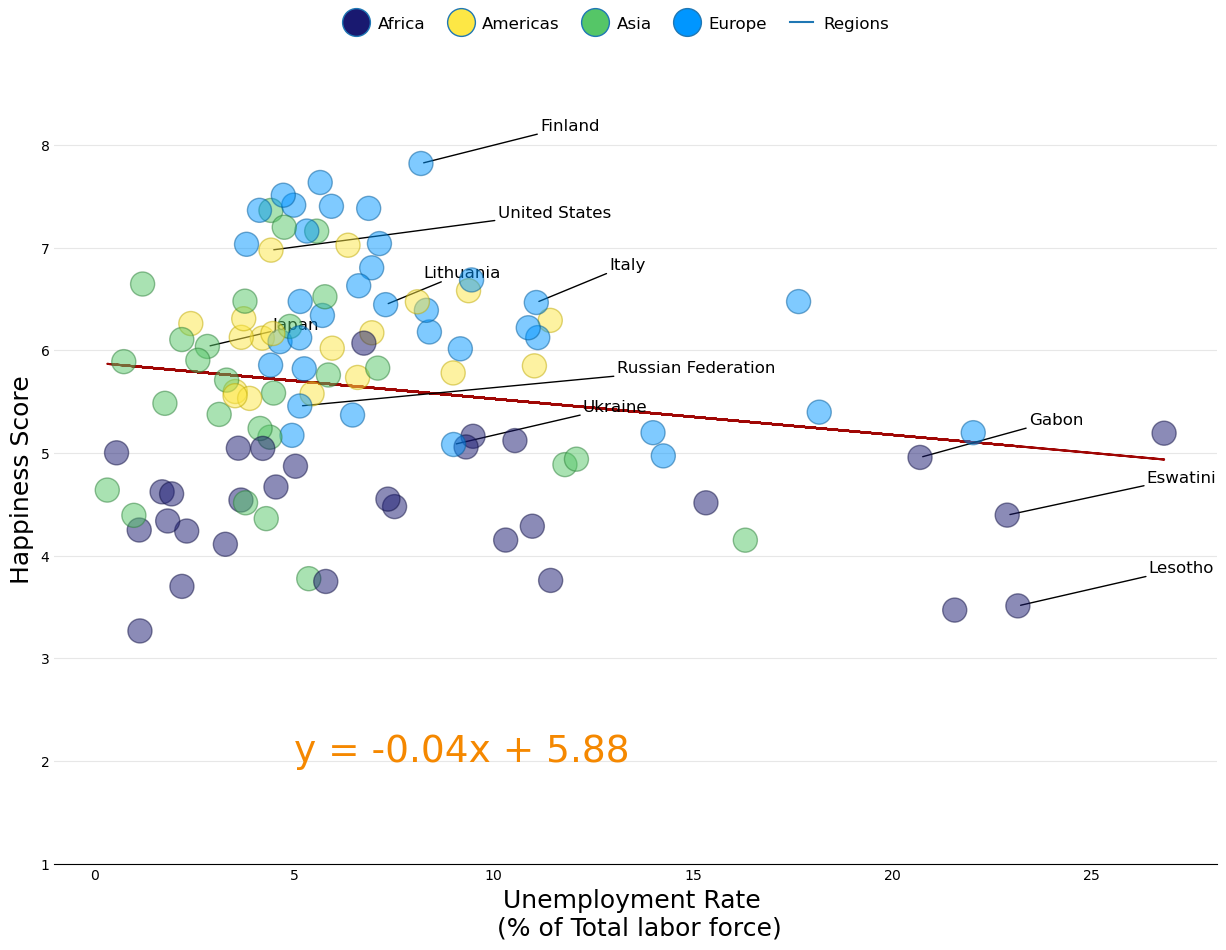

In [16]:
# Linear regression for Unemployment and Happiness Score
xlbl = 'Unemployment Rate \n (% of Total labor force)'
ylbl = 'Happiness Score'
lblpos = (5, 2)
unemp_suic_plt = plotLinearRegression(final_mean_df['Unemployment Rate'],final_mean_df['Happiness Score'],xlbl,ylbl,lblpos)
plt.savefig('output/unemp_happiness_lin_reg.png', dpi=800)

In [ ]:
# Linear regression for Life Expectancy and Happiness Score
xlbl = "Life Expectancy, Years"
ylbl = "Happiness Score"
lblpos = (70, 3)
lifeexp_suic_plt = plotLinearRegression(final_mean_df['Life Expectancy'],final_mean_df['Happiness Score'],xlbl,ylbl,lblpos)
plt.savefig('output/lifeexp_happiness_lin_reg.png', dpi=800)
plt.show()

The r-squared is: 0.7981848450736689


In [ ]:
# Linear regression for Net Income Mean and Happiness Score
xlbl = 'Net National Income Total \n ($, billions)'
ylbl = 'Happiness Score'
lblpos = (10000, 3)
net_income_suic_plt = plotLinearRegression(final_mean_df['Net National Income Total ($) billions'],final_mean_df['Happiness Score'],xlbl,ylbl,lblpos)
plt.savefig('output/net_income_happiness_lin_reg.png', dpi=800)

In [ ]:
# Linear regression for Inflation and Happiness Score
xlbl = 'Consumer Price Inflation \n (Annual %)'
ylbl = 'Happiness Score'
lblpos = (2.5, 2)
infl_suic_plt = plotLinearRegression(final_mean_df['Inflation'],final_mean_df['Happiness Score'],xlbl,ylbl,lblpos)
plt.savefig('output/infl_happiness_lin_reg.png', dpi=800)

In [ ]:
# Linear regression for GDP and Happiness Score
xlbl = 'GDP Total \n ($, billions)'
ylbl = 'Happiness Score'
lblpos = (7500, 3)
gdp_suic_plt = plotLinearRegression(final_mean_df['GDP Total ($) billions'],final_mean_df['Happiness Score'],xlbl,ylbl,lblpos)
plt.savefig('output/gdp_happiness_lin_reg.png', dpi=800)